<a href="https://colab.research.google.com/github/viniciusguirra/Analises_financeiras/blob/main/Relat%C3%B3rio_ibov_com_yfinance_ipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Relatório construído junto a Data viking na Imersão em Dados #01
* Indíce bovespa
* Api Yfinance
* Médias moveis

In [5]:
# Instalar esses pacotes
# Mercado financeiro B3
!pip install yfinance --upgrade --no-cache-dir

In [6]:
# Pacotes
# bibliotecas de "modelagem de dados"
import pandas as pd
import numpy as np
import pandas_datareader.data as web

# Analises gráficas
import matplotlib.pyplot as plt
import seaborn as sns

# Analises gráficas ( alto nível )
import plotly.graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots

# Data
import datetime

# Yahoo Finance
import yfinance as yf
# Args personalizados
yf.pdr_override()

# Avisos
import warnings
warnings.filterwarnings('ignore')

## **API Yahoo Finance**
O yfinance oferece uma maneira segmentada e Pythonic de baixar dados de mercado do Yahoo!Ⓡ finanças .

In [7]:
# Especificar o símbolo da ação e o período de tempo desejado
Simbolo = "^BVSP"

# 1º Opção
Inicio = '2021-11-07'
Fim = '2023-11-07'

# 2º Opção
Periodo = '6mo'

# Coletando os dados
#Dados = web.get_data_yahoo( Simbolo, start=Inicio, end=Fim )
Dados = web.get_data_yahoo( Simbolo, period=Periodo )

# Verificando
Dados.head()

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2023-05-08,105161.0,106716.0,105161.0,106042.0,106042.0,13259200
2023-05-09,106028.0,107731.0,105549.0,107114.0,107114.0,13526600
2023-05-10,107114.0,107744.0,106538.0,107448.0,107448.0,13576900
2023-05-11,107446.0,108667.0,106419.0,108256.0,108256.0,12772100
2023-05-12,108256.0,108817.0,107497.0,108464.0,108464.0,0


In [8]:
# Tipoo da informação
type( Dados )

pandas.core.frame.DataFrame

In [9]:
# Ultimos registros
Dados.tail( 10 )

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2023-10-25,113762.0000,114319.00000,112680.000000,112830.000000,112830.000000,12306500
2023-10-26,112840.0000,114886.00000,112840.000000,114777.000000,114777.000000,12770600
2023-10-27,114777.0000,115342.00000,112953.000000,113301.000000,113301.000000,12289500
2023-10-30,113303.0000,114204.00000,112309.000000,112532.000000,112532.000000,9741800
2023-10-31,112534.0000,113597.00000,112098.000000,113144.000000,113144.000000,10557400
2023-11-01,113157.0000,115433.00000,113157.000000,115053.000000,115053.000000,13904100
2023-11-03,115062.0000,118502.00000,115062.000000,118160.000000,118160.000000,15714000
2023-11-06,118160.0000,118758.00000,118045.000000,118487.000000,118487.000000,10167700
2023-11-07,118422.0000,119577.00000,118026.000000,119268.000000,119268.000000,16393100


In [10]:
# Estatistica Descriva
Dados.describe()

,Open,High,Low,Close,Adj Close,Volume
count,129.000000,129.000000,129.000000,129.000000,129.000000,1.290000e+02
mean,115889.473353,116803.161579,115165.363312,115989.976684,115989.976684,1.106231e+07
std,3736.280496,3605.164295,3635.807022,3624.194387,3624.194387,3.072900e+06
min,105161.000000,106716.000000,105161.000000,106042.000000,106042.000000,0.000000e+00
25%,113996.000000,115056.000000,113036.000000,114060.000000,114060.000000,9.596900e+06
50%,116809.000000,117924.000000,115984.000000,116883.000000,116883.000000,1.102570e+07
75%,118404.000000,119438.000000,117814.000000,118409.000000,118409.000000,1.277210e+07
max,122560.000000,123010.000000,121370.000000,122560.000000,122560.000000,1.886260e+07


In [11]:
# Informações
Dados.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 129 entries, 2023-05-08 to 2023-11-08
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       129 non-null    float64
 1   High       129 non-null    float64
 2   Low        129 non-null    float64
 3   Close      129 non-null    float64
 4   Adj Close  129 non-null    float64
 5   Volume     129 non-null    int64  
dtypes: float64(5), int64(1)
memory usage: 7.1 KB


## **Média Móvel**

**Media Móvel**

A média móvel é um indicador que faz parte da Análise Técnica de ações. Com ela, é possível identificar o equilíbrio dos preços no mercado, observando tendências de alta, neutra ou baixa. A representação gráfica das médias móveis é normalmente feita por uma linha, que se movimenta conforme os dados novos recebidos para o cálculo.

**O que é a média móvel?**

A média móvel é um indicador importante que suaviza os dados dos preços das ações para formar um indicador que segue a tendência.

E como fazer esse cálculo?
<br>
Basta utilizar a fórmula:
MMA = Soma dos preços de fechamento ÷ Número de dias

Considere a média móvel aritmética de 5 dias e sua evolução ao longo de 3 dias, em que os preços diários de fechamento são: <br> 11,12,13,14,15,16 e 17.
<br>

Primeiro dia da MMA de 5 dias: (11 + 12 + 13 + 14 + 15) ÷ 5 = 13 <br>
Segundo dia da MMA de 5 dias: (12 + 13 + 14 + 15 + 16) ÷ 5 = 14 <br>
Terceiro dia da MMA de 5 dias: (13 + 14 + 15 + 16 + 17) ÷ 5 = 15

In [12]:
# Media Simples
Lista = [11, 12, 13, 15, 16, 17]

from statistics import mean as Media
print(f'Media: { Media(Lista) }')
print(f'Media: { (11+12+13+15+16+17) / len(Lista) } ')

Media: 14
Media: 14.0 


In [13]:
# Periodo da média móvel
n = 5

for Intervalo in range(3):
  print(f'{Intervalo}ª Dia: { sum(Lista[Intervalo:n]) / 5 }')

0ª Dia: 13.4
1ª Dia: 11.2
2ª Dia: 8.8


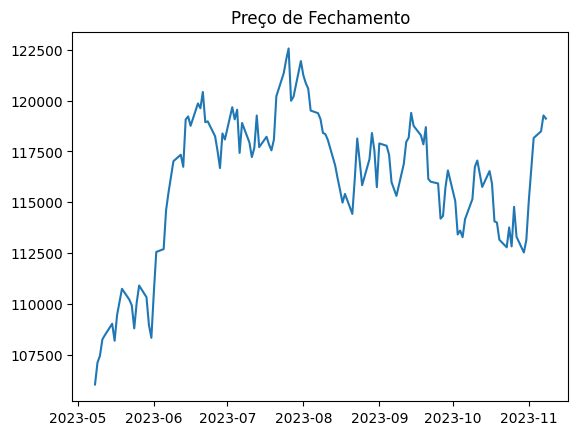

In [14]:
# Plot
plt.plot( Dados['Close'] )
plt.title('Preço de Fechamento');

**Função rolling**

A função rolling() é uma função do pandas que permite calcular estatísticas em janelas deslizantes de dados. <br>
Ela é muito útil para calcular médias móveis, desvios padrão, somatórios, mínimos e máximos, entre outras estatísticas.

In [15]:
Periodo = 5
Dados['Close'].rolling( window=Periodo ).mean()

Date
2023-05-08              NaN
2023-05-09              NaN
2023-05-10              NaN
2023-05-11              NaN
2023-05-12    107464.800000
                  ...      
2023-11-01    113761.400000
2023-11-03    114438.000000
2023-11-06    115475.200000
2023-11-07    116822.400000
2023-11-08    118016.198438
Name: Close, Length: 129, dtype: float64

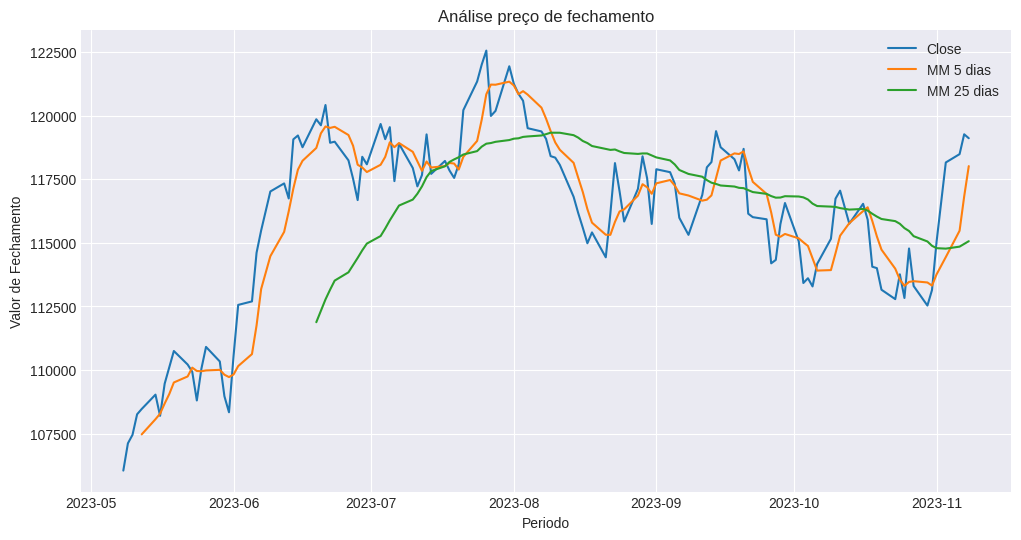

In [16]:
# Plot

# Estilos
plt.style.use('seaborn-darkgrid')

# Tamanho
plt.figure( figsize=(12, 6) )

# Plots
plt.plot( Dados['Close'] )
plt.plot( Dados['Close'].rolling( window=Periodo ).mean() )
plt.plot( Dados['Close'].rolling( window=Periodo + 25 ).mean() )

# Legenda
plt.legend(['Close', 'MM 5 dias', 'MM 25 dias'])

# Labels
plt.ylabel('Valor de Fechamento')
plt.xlabel('Periodo')

plt.title('Análise preço de fechamento');

## **Plotly**

O PLOTLY é uma biblioteca Python de plotagem
interativa e de código aberto que oferece suporte a
mais de 40 tipos de gráficos exclusivos, abrangendo
uma ampla variedade de casos de uso estatísticos,
financeiros, geográficos, científicos e
tridimensionais.

**plotly.express (px)** é uma maneira rápida e fácil de criar visualizações dinâmicas de dados.<br>
**plotly.graph_objects (go)** é a API de nível inferior que concede mais controle sobre suas visualizações, mas é mais intensiva em código.

In [17]:
Dados.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2023-05-08,105161.0,106716.0,105161.0,106042.0,106042.0,13259200
2023-05-09,106028.0,107731.0,105549.0,107114.0,107114.0,13526600
2023-05-10,107114.0,107744.0,106538.0,107448.0,107448.0,13576900
2023-05-11,107446.0,108667.0,106419.0,108256.0,108256.0,12772100
2023-05-12,108256.0,108817.0,107497.0,108464.0,108464.0,0


In [18]:
Periodo = 5
Dados['Media_Movel'] = Dados['Close'].rolling( window=Periodo ).mean()

Dados.head()

,Open,High,Low,Close,Adj Close,Volume,Media_Movel
Date,,,,,,,
2023-05-08,105161.0,106716.0,105161.0,106042.0,106042.0,13259200,NaN
2023-05-09,106028.0,107731.0,105549.0,107114.0,107114.0,13526600,NaN
2023-05-10,107114.0,107744.0,106538.0,107448.0,107448.0,13576900,NaN
2023-05-11,107446.0,108667.0,106419.0,108256.0,108256.0,12772100,NaN
2023-05-12,108256.0,108817.0,107497.0,108464.0,108464.0,0,107464.8


In [19]:
# EXPRESS
px.line( Dados, y='Close', title='Fechamento' )

In [20]:
# GO
Figure_02 = go.Figure(
    data=go.Scatter(
        x=Dados.index,
        y=Dados['Close'],
        line=( dict(color='firebrick', width=3) )
    )
)

Figure_02.update_layout(
    title='Análise de Fechamento',
    xaxis_title='Periodo',
    yaxis_title='Preço de fechamento'
)

Figure_02.show()

In [21]:
# Cria um gráfico de área (área preenchida)
Area = px.area(
    data_frame=Dados.reset_index(),
    y='Close', x='Date',
    title=f'{Simbolo}'
)

# Atualiza as configurações dos eixos x (datas) do gráfico
Area.update_xaxes(
    title_text='Data',
    rangeslider_visible=True,
    rangeselector=dict(
        buttons=list([
            dict(count=1, label='1M', step='month', stepmode='backward'),
            dict(count=6, label='6M', step='month', stepmode='backward'),
            dict(count=1, label='1Y', step='year', stepmode='backward'),
            dict(step='all')
        ])
    )
)

# Ajustano o eixo Y
Area.update_yaxes( title_text='Price in USD', ticksuffix='$')

# Ajustar o titulo
Area.update_layout(
    showlegend=True,
    title={
        'text': f'{Simbolo} ({Dados.index.min().year}-Presente)',
        'y': 0.9,
        'x': 0.5,
        'xanchor': 'center',
        'yanchor': 'top'
      },
      template="plotly_white"
    )

Area

## **Candlestick Charts**
<br>
É um estilo de gráfico financeiro que descreve abertura, alta, baixa e fechamento para uma determinada xcoordenada (tempo mais provável). As caixas representam a dispersão entre os valores opene closee as linhas representam a dispersão entre os valores lowe high. Pontos de amostragem onde o valor de fechamento é maior (inferior) do que o valor de abertura são chamados de crescentes (decrescentes). Por padrão, as velas crescentes são desenhadas em verde, enquanto as decrescentes são desenhadas em vermelho.

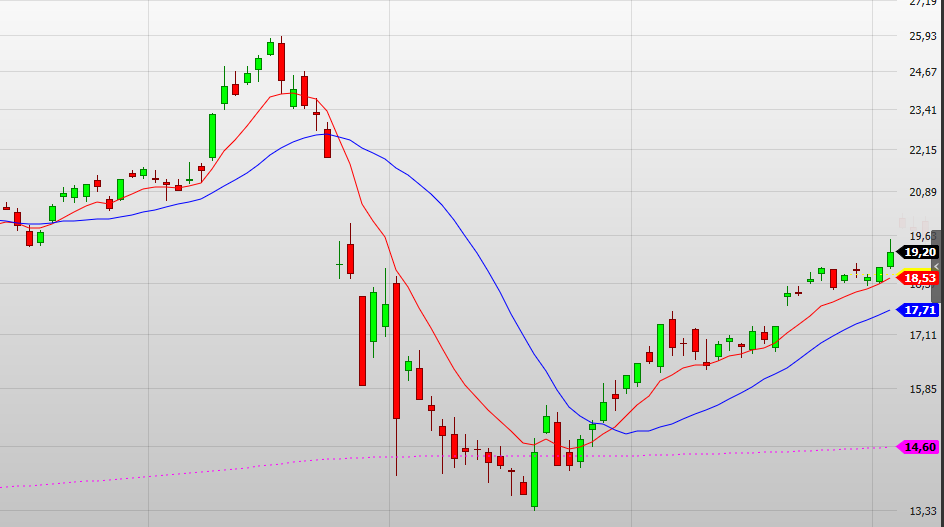

In [22]:
# Grafico clandestik
Grafico_Candlestick = go.Figure(
    data=[
        go.Candlestick(
            x=Dados.index,
            open=Dados['Open'],
            high=Dados['High'],
            low=Dados['Low'],
            close=Dados['Close'],
            increasing_line_color='cyan',
            decreasing_line_color='gray'
        )
    ]
)

Grafico_Candlestick.update_layout(
    xaxis_rangeslider_visible=False,
    title='Análise Fechamento',
    xaxis_title='Periodo',
    yaxis_title='Preço de Fechamento'
)

Grafico_Candlestick.show()

## **Criando Relátorio**

In [23]:
# Construção do Relatório
Relatorio = make_subplots(
    rows=2,
    cols=1,
    specs=[
        [ {'type':'candlestick'} ],
        [ {'type':'scatter'} ],
    ],
    subplot_titles=('Cotação', 'Fechamento'),
    # Compartilhar mesmo eixo x
    shared_xaxes=True,
    # Largura da verticla
    vertical_spacing=0.075

)

# Ajuste do Layout
Relatorio.update_layout(
    # Dimensao
    width=1000, height=800,

    # Titulo no relatorio
    title_text='<b>Data Analytics</b> <br>Cotação do Indíce Bovespa',

    # Estilo
    template='plotly_dark',

    # Ajuste de layout gráficos
    paper_bgcolor='rgb(0, 0, 0)',
    plot_bgcolor='rgb(10, 10, 10)',

    # Fonte do texto
    font=dict(color='white')
)

# Colocando um grafico na 1 º Linha
Relatorio.add_trace(
    go.Candlestick(
        x=Dados.index,
        open=Dados['Open'],
        high=Dados['High'],
        low=Dados['Low'],
        close=Dados['Close'],
        increasing_line_color='#00FF00',
        decreasing_line_color='#FF0000'
    ), row=1, col=1
)

# Retirando a barra visivel
Relatorio.update_layout(
    xaxis_rangeslider_visible=False
)

# Adicionado um gráfico na 2º Posição
Relatorio.add_trace(
    go.Scatter(
        x=Dados.index,
        y=Dados['Close'],
        mode='lines',
        name='Fechamento',
        line=dict(color='#008000')
    ),
    row=2, col=1
)

Relatorio.add_trace(
    go.Scatter(
        x=Dados.index,
        y=Dados['Media_Movel'],
        mode='lines',
        name='Média Móvel',
        line=dict(color='#D33682')
    ),
    row=2, col=1
)

# Ajuste
Relatorio.update_layout(
    legend=dict(
        # Posição
        orientation='h',

        # Eixo X e Y
        yanchor='bottom',
        y=1.02,
        xanchor='right',
        x=1,
        font=dict( size=9)
    )
)

# Acionar texto
Relatorio.add_annotation(
    # Seta (desativada)
    showarrow=False,
    # Texto
    text='Análise feita por Vinícius Guirra',
    # Tamanho
    font=dict(size=12),

    # Aponta as direções do texto
    xref='x domain',
    x=1,
    yref='y domain',
    y=-1.4
)

Relatorio.add_annotation(
    showarrow=False,
    text='By: Vinícius Guirra @guirracruz | @data.verso',
    font=dict(size=12),

     # Aponta as direções do texto
    xref='x domain',
    x=0,
    yref='y domain',
    y=-1.4
)

Relatorio
